# SFZ Kurs - KI trifft Python: Dein Weg zur eigenen Objekterkennung

## Inhalt der Einheit: Einführung in die Objekterkennung
- Einführung in Python
- Einlesen von Kameras
- Bearbeiten von Kamerabildern - Wie sieht ein PC
- Einfache Objekterkennung
- Gesichtserkennung

![Face Detection](./Facedetection.png)


## Einführung in Python

Python ist eine interpretierte Programmiersprache welche sehr viele Module anbietet.
Wir werden diese Module verwenden um eine einfache Objekterkennung von Grund auf zu erstellen.

Hierfür müssen wir jedoch erst ein paar grundlegende Python Grundlagen verstehen:

### Variablen
Variablen ermöglichen es euch, Werte zu speichern und später wiederzuverwenden. Z.B.:
```
wert1 = 5
wert2 = wert1 + 7
```
Nun ist a wert1 gleich 5 und wert2 gleich 12 gesetzt.

### Abfragen
Um Abfragen zu ermöglichen (Wenn/Dann) kann in python if verwendet werden. Um die nicht zutreffenden Fälle abzubilden wird else verwendet. Z.B.:
```
if wert1 < 10:
    print("Wert ist kleiner 10")
elif wert1 == 100:
    print("Wert ist genau 100")
else:
    print("Wert is größer oder gleich 10")
```

### Schleifen
Mit Schleifen kann Code ausgeführt werden, bis eine bestimmte Bedingung zutrifft. Wir können zum Beispiel so lange zählen bis wir bei der Zahl 20 angekommen sind. Hierfür kann in Python while oder for verwendet werden. Z.B.:
```
for counter in range(0,20):
    print(counter)
```
oder
```
counter = 0
while counter < 20:
    print(counter)
    counter += 1
```


In [ ]:
# Variablen Code
wert1 = 5
wert2 = "Hallo Welt"
print(wert1)  # Gibt 5 aus
print(wert2)  # Gibt Hallo Welt aus

5
Hallo Welt


In [ ]:
# Abfrage (Wenn/Dann) Code
if wert1 < 10:
    print("Wert ist kleiner 10")
else:
    print("Wert is größer oder gleich 10")

Wert ist kleiner 10


In [ ]:
for counter in range(0,5):
    print(counter)

counter = 0
while counter > -5:
    print(counter)
    counter = counter - 1

0
1
2
3
4
0
-1
-2
-3
-4


### Funktionen
Oft ist es beim Programmieren notwendig, den selben Code an mehreren Stellen anzuwenden. Damit hier der Code nicht mehrmals geschrieben werden muss, können so genannte Funktionen verwendet werden. Z.B. müssen wir mehrere Bilder im Internet laden. Der Code hierfür ist relativ lange, daher definieren wir eine Funktion die für uns das Bild lädt:

```
def load_image_cv2(url):
    # ... hier passiert viel code
    img = # ... hier wird das Bild geladen
    return img  # Hier wird das geladene Bild zurückgegeben
```

In unserem Code können wir dann über diese Funktion das Bild laden
```
geladenesBild = load_image('https://images.pexels.com/photos/1563356/pexels-photo-1563356.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1')
```

## Installation von Modulen
In Python können bestimmte Funktionen, wie das Laden einer Kamera oder das Training eines Neuronalen Netzen, über so genannte Module geladen werden. Ihr müsst also nicht alles neu programmieren. Der nächste Block installiert die in diesem Tutorial verwendeten Module mittels

```
pip install
```

Danach können diese Module über import, z.B.:

```
import cv2
```

verwendet werden

In [ ]:
%pip install opencv-python matplotlib numpy

- opencv lässt uns auf die Kamera zugreifen und coole Dinge damit machen
- matplotlib verwenden wir um Bilder darzustellen
- numpy wird verwendet um die Bearbeitung von Bildern zu vereinfachen

## Verwenden der Kamera

Um eine Kamera einzubinden können wir das Modul cv2 verwenden. Mithilfe von matplotlib können wir Bilder darstellen.

```
import cv2
import matplotlib.pyplot as plt
```

Über cv2.VideoCapture(0) können wir daraufhin auf die stardard Kamera zugreifen (Hinweis VideoCapture ist eine Funktion, an welche wir das Argument 0 übergeben, welches die erste Kamera ist welche das System kennt, also die standard Kamera).

```
camera = cv2.VideoCapture(0)
```

Über camera.read() können wir dann die Kamera "lesen" was euch den aktuellen Frame (das aktuell aufgenommen Bild) wiedergibt. Außerdem wird ein Fehler zurückgegeben wenn etwas nicht funktioniert.

```
error, frame = camera.read()
```

Um nun diesen Frame (das Bild) darzustellen können wir plt.imshow(frame) verwenden. Um das Bild danach tatsächlich anzuzeigen müssen wir noch plt.show() verwenden.

```
plt.imshow(frame)
plt.show()
```

Wichtig am Ende: Wir müssen die Kamera wieder freigeben!

```
cap.release()
```

In [ ]:
# Lösung - Kamera einbinden
import cv2
import matplotlib.pyplot as plt

camera = cv2.VideoCapture(0)
error, frame = camera.read()

plt.imshow(frame)
plt.show()

camera.release()

# Fällt dir hierbei etwas spezielles auf?
    # cv2 liefert die Bilder in BGR matplotlib nimmt diese aber als RGB an, daher ist rot und blau vertauscht!

### Vertauschte Farben?

Wie ihr in dem Beispiel sehen könnt liefert cv2 die Bilder in BGR (Blau-Grün-Rot Format), matplotlib nimmt diese aber als RGB an, daher ist rot und blau vertauscht! Über cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) können wir den Farbbereich von BGR in RGB umwandeln

```
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
```

In [ ]:
# Jetzt sind die Farben richtig :)
import cv2
import matplotlib.pyplot as plt

camera = cv2.VideoCapture(0)
error, frame = camera.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame)
plt.show()

camera.release()

## Live Video

Bis jetzt nehmen wir immer nur ein Bild auf, etwas langweilig. Wir können aber in einer Endlosschleife immer einen neuen Frame aufnehmen und diesen ausgeben. Eine Endlosschleife kann mit while 1==1: definiert werden (bedeutet: führe das so lange aus wie 1==1 ist, was es immer sein wird, daher Endlosschleife). Alternativ kann auch einfach while True verwendet werden

```
while True:
    print('abc')  # Gibt, bis es unterbrochen wird, 'abc' aus. Ich empfehle NICHT diesen Code auszuführen
```

Wenn wir nun in diese Endlosschleife das gleiche wie vorher machen, haben wir eine Live Kamera! Wir brauchen jedoch noch einen Weg um aus der Endlosschleife auszubrechen, sobald wir fertig sind. Mittels diesem Code können wir in der Schleife checken, ob in einer cv2 Anwendung eine Taste gedrückt wurde: if cv2.waitKey(1) & 0xFF == ord('q'). An diesem Code ist hauptsächlich ord('q') wichtig. Hiermit gebt Ihr an auf welche Taste gehört wird (In diesem Beispiel achten wir darauf ob die Q Taste gedrückt wurde). Mithilfe von break, kann die Endlosschleife unterbrochen werden.

```
if cv2.waitKey(1) & 0xFF == ord('q'):  # Bricht die Schleife ab, wenn 'q' gedrückt wird
    break
```

Da wir nur in cv2 Anwendungen auf unsere Tastendrucke höhren können, müssen wir die Frames über cv2 Ausgeben, nicht über matplotlib. Anstelle von plt.imshow(frame) und plt.show() verwenden wir nun also cv2.imshow("Camera", frame)

```
cv2.imshow("Camera", frame)
```


In [ ]:
# Live Video Beispiel - Lösung
import cv2

camera = cv2.VideoCapture(0)

while True:
    error, frame = camera.read()
    if not error:  # Wenn ein Fehler auftritt (error = false)
        break  # brechen wir ab

    cv2.imshow("Camera", frame)  # Zeigt das Bild in einem OpenCV-Fenster an

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Bricht die Schleife ab, wenn 'q' gedrückt wird
        break

camera.release()  # Freigeben der Kamera
cv2.destroyAllWindows()  # Schließt das Fenster nach Beenden der Schleife

## Live Video Bearbeitung

Da wir den Frame nun in unserem Program haben, können wir diesen natürlich auch live verändern.

### Helligkeit

Eine einfache Veränderung ist die Helligkeit des Frames. Ein Frame ist eigentlich nur eine Anordnung vieler, 3 farbiger Pixel mit Werten von 0-255. Wenn wir nun die Helligkeit erhöhen oder verringern wollen müssen wir einfach jeden einzelnen Pixel um einen bestimmten Anteil erhöhen/verringern. Das kann in cv2 mit der Funktion cv2.convertScaleAbs gemacht werden.

```
frame = cv2.convertScaleAbs(frame, alpha=newbrightness, beta=0)  # Wenn newbrightness kleiner als 1 ist wird die Helligkeit reduziert, bei größer 1 wird diese erhöht
```

Z.B. hat ein blauer Punkt die RGB (Rot-Grün-Blau) Werte: (0, 0, 255). Wenn wir diesen Punkt jetzt etwas dunkler machen wollen können wir den Punkt mit 0.9 multiplizieren. Danach sind die Werte des Punktes (0, 0, 229)!

In [ ]:
# Live Video Bearbeitung - Helligkeit - Lösung
import cv2
cap = cv2.VideoCapture(0)

brightness = 1.0  # Steuert die Helligkeit des Bildes

while True:
    error, frame = cap.read()
    if not error:
        break

    frame = cv2.convertScaleAbs(frame, alpha=brightness, beta=0)  # Hier übergeben wir einen Faktor alpha, welcher die Hellihkeit des Frames steuert (multipliziert)

    cv2.imshow("Camera", frame)
    key = cv2.waitKey(1) & 0xFF  # Liest gedrückte Tasten

    if key == ord('q'):  # Wenn q --> abbrechen
        break
    elif key == ord('+'):  # Wenn + --> Helligkeit erhöhen
        brightness += 0.1
    elif key == ord('-'):  # Wenn - --> Helligkeit veringern
        brightness = max(0.1, brightness - 0.1)  # Helligkeit ist immer mindestens 0.1

cap.release()
cv2.destroyAllWindows()


### Schwarz-Weiß Bild

Mithilfe der Funktion cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) können wir unser Farbbild in ein Schwarz-Weiß Bild umwandeln.

```
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
```

Hinweis: Der Wert gray im Beispiel ist ein so genannter Wahrheitswert (Boolean). Dieser kann entweder True oder False sein. Um eine Wahrheitswert von True auf False zu ändern kann
```
gray = not gray
```
verwendet werden.


In [ ]:
# Live Video Bearbeitung - Schwarz-Weiß Bild - Lösung
import cv2
cap = cv2.VideoCapture(0)

brightness = 1.0
gray = False  # Hier speichern wir ab ob wir aktuell ein Schwarz-Weiß Bild darstellen oder nicht (True -> Ja, False -> Nein)

while True:
    error, frame = cap.read()
    if not error:
        break

    if gray:  # Wenn wir ein Schwarz-Weiß Bild darstellen wollen
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Aufgabe: Überschreibe frame mit dem Schwarz-Weiß Bild
    frame = cv2.convertScaleAbs(frame, alpha=brightness, beta=0)

    cv2.imshow("Camera", frame)
    key = cv2.waitKey(1) & 0xFF  # Liest gedrückte Tasten

    if key == ord('q'):
        break
    elif key == ord('+'):
        brightness += 0.1
    elif key == ord('-'):
        brightness = max(0.1, brightness - 0.1)
    elif key == ord('g'):  # Wenn g --> Wechsel auf Graubild
        gray = not gray # Aufgabe: Wenn die Taste g gedrückt wird soll sich gray von True auf False oder umgekehrt ändern, sprich,
        #wenn wir ein Farbbild darstellen sollen wir danach ein Schwarz-Weiß Bild darstellen und umgekehrt

cap.release()
cv2.destroyAllWindows()


## Was kann der PC eigentlich sehen?

Um diese Frage zu beantworten können wir uns den folgenden Code ausführen:

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

brightness = 1.0
gray = False

def get_pixel_value(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse button click
        if gray:
            print(f"Clicked at ({x}, {y}): Value={frame[y, x]}")
        elif not gray:
            b, g, r = frame[y, x]  # Get BGR values
            print(f"Clicked at ({x}, {y}): R={r}, G={g}, B={b}")

# Create OpenCV window and set mouse callback
cv2.namedWindow("Camera")
cv2.setMouseCallback("Camera", get_pixel_value)

ret, frame = cap.read()

while True:
    cv2.imshow("Camera", frame)

    key = cv2.waitKey(1) & 0xFF  # Liest gedrückte Tasten

    if key == ord('q'):
        break
    elif key == ord('+'):
        frame = cv2.convertScaleAbs(frame, alpha=1.1, beta=0)
    elif key == ord('-'):
        frame = cv2.convertScaleAbs(frame, alpha=0.9, beta=0)
    elif key == ord('g'):  # Wenn g --> Wechsel auf Graubild
        gray = not gray
        if gray:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        elif not gray:
            ret, frame = cap.read()

cap.release()
cv2.destroyAllWindows()


Clicked at (337, 380): R=107, G=181, B=192
Clicked at (218, 341): R=2, G=16, B=9
Clicked at (535, 94): R=111, G=120, B=99
Clicked at (528, 97): R=109, G=126, B=118
Clicked at (524, 104): R=113, G=131, B=121
Clicked at (539, 104): R=104, G=118, B=101
Clicked at (532, 105): R=105, G=123, B=111
Clicked at (74, 345): R=106, G=40, B=35
Clicked at (322, 180): R=111, G=114, B=94


In diesem Code passiert sehr viel änlich wie vorher:
- Module werden geladen
- Die Kamera wird geladen
- Wir haben eine Endlosschleife
- Unser Frame wird geladen
- Helligkeit und Schwarz-Weiß -> Farbbild ist ermöglicht
- An Ende wird alles sauber zusammengeräumt

Zusätzlich wird die Kamera ohne Frame (also als leeres Bild) geöffnet und vermerkt was gemacht werden soll, wenn auf dieses Fenster geklickt wird (bestimmen wir in der get_pixel_value Funktion).

```
cv2.namedWindow("Camera")
cv2.setMouseCallback("Camera", get_pixel_value)
```

Bei einem Linken Mausklick in das Fenster wird als erstes überprüft ob das Bild ein Farbbild ist oder nicht und dann werden entweder die Rot-Grün-Blau Anteile oder der Grauwert ausgegeben.

```
def get_pixel_value(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse button click
        if gray:
            print(f"Clicked at ({x}, {y}): Value={frame[y, x]}")
        elif not gray:
            b, g, r = frame[y, x]  # Get BGR values
            print(f"Clicked at ({x}, {y}): R={r}, G={g}, B={b}")
```

**Diese Werte die hier ausgegeben werden sind das, was euer PC sehen kann!**

### Formen in Live Videos

Objekterkennung beschreibt zwei unterschiedliche Aufgaben:
- Erkennen welche Objekte im Frame vorkommen
- Erkennen wo diese Objekte sind

Hierfür ist es praktisch Formen (Rechtecke) in einen Frame einzuzeichnen um das erkannte Objekt hervorzuheben. In cv2 kann über cv2.rectangle() ein Rechteck in einen Frame gezeichnet werden.

```
cv2.rectangle(frame, (10, 10), (10+150, 10+150), (0, 255, 0), 2)
```

Der gegebene Code zeichnet ein Rechteck in den Frame, welches auf Position (10,10) beginnt und bis Position (160,160) reicht. Es ist also ein 150 Pixel großes Quadrat. Die Farbe ist (0, 255, 0) was in Rot-Grün-Blau ein grünes Rechteck ergibt. Die dicke der Linie ist auf 2 gesetzt.


In [ ]:
# Live Video Bearbeitung - Formen einfügen - Lösung
import cv2

cap = cv2.VideoCapture(0)

rectangle = False
rectangle_pos = (0,0)

def get_rectangle_position(event, x, y, flags, param):  # Diese Funktion wird ausgeführt sobald auf den Frame geklickt wird. x und y geben an welcher Pixel geklickt wurde
    global rectangle, rectangle_pos
    if event == cv2.EVENT_LBUTTONDOWN:  # Linke Maustaste wurde gecklickt
        rectangle = True
        rectangle_pos = (x,y)  # Aufgabe: wie können wir den Startpunkt des Rechtecks richtig setzen?

cv2.namedWindow("Camera")
cv2.setMouseCallback("Camera", get_rectangle_position)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if rectangle:
        # Aufgabe: Hier soll ein Rechteck in den frame gezeichnet werden
        # mit (rectangle_pos[0], rectangle_pos[1]) als Startpunkt
        # (rectangle_pos[0]+150, rectangle_pos[1]+150) als Endpunkt
        # grüner Farbe
        # und einer Liniendicke von 2
        cv2.rectangle(frame, (rectangle_pos[0], rectangle_pos[1]), (rectangle_pos[0]+150, rectangle_pos[1]+150), (0, 255, 0), 2)

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()


### Text in Live Video

Oft ist es auch sehr praktisch, Text in einen Frame einfügen zu können, z.B. um zu beschreiben was gefunden wurde. Über cv2 kann das mittels cv2.putText() gemacht werden. Ähnlich zum Rechteck hat diese Funktion einige Parameter wie

- text = "WAS WURDE GEFUNDEN"
- font = cv2.FONT_HERSHEY_SIMPLEX  # eine Schriftart, mehr siehe hier: https://codeyarns.com/tech/2015-03-11-fonts-in-opencv.html#gsc.tab=0
- font_scale = 1  # Scalierung (Vergrößerung und Verkleinerung der Schrift)
- color = (0, 255, 0)  # Farbe
- thickness = 1  # Dicke

Dann kann der Text mittels

```
cv2.putText(frame, text, (rectangle_pos[0], rectangle_pos[1]), font, font_scale, color, thickness)
```

eingefügt werden

In [ ]:
# Live Video Bearbeitung - Text einfügen
import cv2

cap = cv2.VideoCapture(0)

rectangle = False
rectangle_pos = (0,0)

def get_rectangle_position(event, x, y, flags, param):
    global rectangle, rectangle_pos
    if event == cv2.EVENT_LBUTTONDOWN:
        rectangle = True
        rectangle_pos = (x,y)

cv2.namedWindow("Camera")
cv2.setMouseCallback("Camera", get_rectangle_position)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if rectangle:
        cv2.rectangle(frame, (rectangle_pos[0], rectangle_pos[1]), (rectangle_pos[0]+100, rectangle_pos[1]+100), (0, 255, 0), 2)

        # Aufgabe: Hier soll euer Name über dem Rechteck dargestellt werden

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
# Live Video Bearbeitung - Text einfügen - Lösung
import cv2

cap = cv2.VideoCapture(0)

rectangle = False
rectangle_pos = (0,0)

def get_rectangle_position(event, x, y, flags, param):
    global rectangle, rectangle_pos
    if event == cv2.EVENT_LBUTTONDOWN:
        rectangle = True
        rectangle_pos = (x,y)

cv2.namedWindow("Camera")
cv2.setMouseCallback("Camera", get_rectangle_position)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if rectangle:
        cv2.rectangle(frame, (rectangle_pos[0], rectangle_pos[1]), (rectangle_pos[0]+100, rectangle_pos[1]+100), (0, 255, 0), 2)

        # Aufgabe: Hier soll euer Name über dem Rechteck dargestellt werden
        text = "Max"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        color = (0, 255, 0)
        thickness = 1

        cv2.putText(frame, text, (rectangle_pos[0]+10, rectangle_pos[1]-10), font, font_scale, color, thickness)

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()


## Einfache Objekterkennung

Bevor wir mit komplexer Objekterkennung mittels tiefem Lernen starten, werden wir uns konventionelle Objekterkennung ansehen. Die einfachste Objekterkennung basiert auf der globalen Analyse von Farben in Bildern. Mittels Quantisierung, welche im nächstem Codeabschnitt gezeigt wird, kann diese Farbanalyse verbessert werden.

Ihr könnt versuchen den folgenden Objekterkennungscode mit Quantisierung zu verbessern

In [ ]:
# Quantisierung Beispiel
import cv2
import numpy as np

def simple_quantization(image, levels=4):
    """ Reduce the number of colors using bit-shifting """
    if levels < 2:
        levels = 2
    shift = 256 // levels  # Compute step size
    quantized = (image // shift) * shift  # Reduce color depth
    return quantized

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    quantized_frame = simple_quantization(frame, levels=4)  # Über den levels Parameter kann die Quantisierung eingestellt werden.
    # Wenn dieser Parameter sehr niedrig ist, werden ähnliche Farben in die gleiche Farbe übersetzt, sprich, es gibt weniger Farbunterschiede im Bild

    cv2.imshow("Simple Quantization", quantized_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


### Farbenbasierte Objekterkennung in Bildern

In den folgenden Beispielen laden wir Bilder aus dem Internet und verwenden Farben um Objekte vom Hintergrund zu trennen (ähnlich wie ein Green-Screen). Um ein Bild aus dem Internet zu laden könnt Ihr die load_image_cv2(URL) Funktion verwenden. Wenn alles gut läuft, könnt ihr das Bild so laden:

```
blueCar = "https://media.istockphoto.com/id/2158624488/photo/skoda-enyaq-electric-car.webp?s=2048x2048&w=is&k=20&c=UpH5XPNids_ZIPH-nfGxPTPe8N1m4_facFMFkkhX_4s="
blue_car_img = load_image_cv2(blueCar)
```

In [ ]:
def load_image_cv2(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, stream=True, headers=headers)
    if response.status_code == 200:
        img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
        return img
    else:
        print("Failed to load image:", url)
        return None

**Die Idee ist nun diese:**
Nach dem erfolgreichem Laden eines Bildes können wir Objekte in diesem finden indem wir uns die Farben im Bild genauer ansehen. In diesem Beispiel ist das Auto sehr Blau, wärend der Hintergrund grün und grau ist. Wenn wir also in unserem Bild die Blaue Farbe analysieren (in RGB ist das die letzte Farbe) können wir sagen wir haben das Auto gefunden, wenn das Bild sehr Blau ist.

![Blaues Auto](./blueCar.png)

Um die unterschiedlichen Farben des Bildes zu analysieren können wir
- rotbild = bild[:, :, 0]  # Rote
- grünbild = bild[:, :, 1]  # Grüne
- blaubild = bild[:, :, 2]  # Blau

verwenden. Danach können wir überprüfen ob das Bild hohe Blauwerte aufweist und gleichzeitig wenige Grün- und Rotwerte.
- blue_channel > 100
- green_channel < 100
- red_channel < 100



In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Addresse zu den Bildern (sehr gerne könnt ihr eure eigenen Bilder verwenden):
blueCar = "https://media.istockphoto.com/id/2158624488/photo/skoda-enyaq-electric-car.webp?s=2048x2048&w=is&k=20&c=UpH5XPNids_ZIPH-nfGxPTPe8N1m4_facFMFkkhX_4s="

# Hier laden wir die Bilder
blue_car_img = load_image_cv2(blueCar)

# Code um das Blaue Auto zu finden
red_channel, green_channel, blue_channel = blue_car_img[:, :, 0], blue_car_img[:, :, 1], blue_car_img[:, :, 2]
blue_threshold, green_threshold, red_threshold = blue_channel > 100, green_channel < 100, red_channel < 100

print('Je heller dieses Bild, umso höher ist der Blauwert im Bild')
plt.imshow(blue_channel, cmap='gray')
plt.show()
print('Alles was weiß ist hat einen höheren Blauwert wie 100. Warum ist dann der Boden weiß?')
plt.imshow(blue_threshold, cmap='gray')
plt.show()
print('Und warum ist das klar blaue Auto grün???')
plt.imshow(green_threshold, cmap='gray')
plt.show()

**Je heller das Bild, umso mehr der Grün- und Rotkanäle ist im Bild enthalten.** Um also das Auto korrekt zu finden **muss**
- Das Bild einen besonders hohen Blauwert aufweisen und gleichzeitig
- einen geringeren Grün- und Rotwert
- Abschließend müssen wir alle 3 Ausschliesverfahren kombinieren um das Auto zu finden

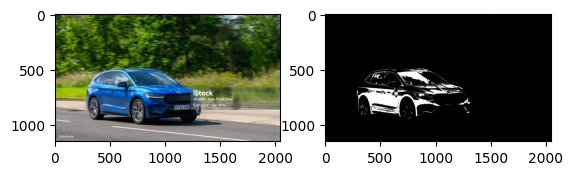

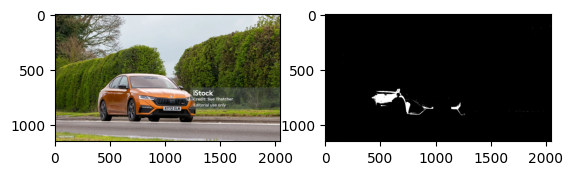

In [ ]:
# In diesem Beispiel wird diese Art der Objekterkennung dargestellt
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Addresse zu den Bildern (sehr gerne könnt ihr eure eigenen Bilder verwenden):
blueCar = "https://media.istockphoto.com/id/2158624488/photo/skoda-enyaq-electric-car.webp?s=2048x2048&w=is&k=20&c=UpH5XPNids_ZIPH-nfGxPTPe8N1m4_facFMFkkhX_4s="
orangeCar = "https://media.istockphoto.com/id/1485360485/photo/%C5%A1koda-octavia.webp?s=2048x2048&w=is&k=20&c=q5mE880v_twxD1ghU58k13PF_Bf3xhILgSSKUNNvUfQ="

# Hier laden wir die Bilder
blue_car_img = load_image_cv2(blueCar)
orange_car_img = load_image_cv2(orangeCar)

# Auswahl der Farbkanäle rot, grün und blau
red_channel, green_channel, blue_channel = blue_car_img[:, :, 0], blue_car_img[:, :, 1], blue_car_img[:, :, 2]
# Setzen der Erkenner für rot, grün und blau
blue_threshold = blue_channel > 100
green_threshold = green_channel < 100
red_threshold = red_channel < 100
# Kombinieren des Ausschliesverfahren
blue_mask = blue_threshold & green_threshold & red_threshold


plt.subplot(1, 2, 1)
plt.imshow(blue_car_img)
# plt.axis("off")  # Wenn euch die Axen stören könnt ihr diese so ausstellen
plt.subplot(1, 2, 2)
plt.imshow(blue_mask, cmap='gray')
# plt.axis("off")  # Wenn euch die Axen stören könnt ihr diese so ausstellen
plt.show()


# Gleiches für das orange Auto
red_channel, green_channel, blue_channel = orange_car_img[:, :, 0], orange_car_img[:, :, 1], orange_car_img[:, :, 2]
blue_threshold = blue_channel < 25
green_threshold = green_channel < 100
red_threshold = red_channel > 100

orange_mask = blue_threshold & green_threshold & red_threshold

plt.subplot(1, 2, 1)
plt.imshow(orange_car_img)
plt.subplot(1, 2, 2)
plt.imshow(orange_mask, cmap='gray')
plt.show()


**Und wir haben unsere Autos gefunden!** Nun können wir einfach die Mitte des Autos berechnen und wir sind fertig.

Wenn sich die Objekte welche wir suchen grundsätzlich in der Helligkeit unterscheiden ist es oft einfacher, ein Bild in ein Schwarz-Weiß-Bild umzuwandeln und zu sagen, alles was im Bild dunkel ist, das ist mein Objekt:

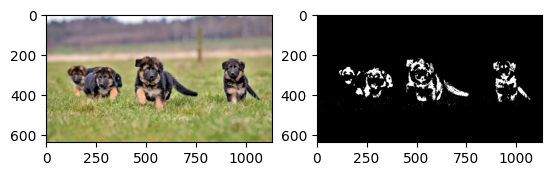

In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

dogsImage = 'https://news.clemson.edu/wp-content/uploads/2022/03/german-shepherd-41731015-1130x636.jpg'
dogs = load_image_cv2(dogsImage)

if dogs is not None:
    plt.subplot(1, 2, 1)
    plt.imshow(dogs)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(dogs, cv2.COLOR_BGR2GRAY) < 50, cmap='gray')
    plt.show()


### Erweiterte Objekterkennung

Typischerweise werden Objekte nicht nur über die Farbe erkannt, auch wenn das häufig ein wichtiger Teil ist.
Ein weiterer wichtiger Schritt in der Objekterkennung ist die Kantenerkennung:

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Anwendung der Kantenerkennung (X and Y Gradienten)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Vertikal
    sobel_combined = cv2.convertScaleAbs(cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0))  # Kombinieren

    cv2.imshow("Sobel Edge Detection", sobel_combined)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


**Wie funktioniert das?**

1. Wir brauchen ein Bild mit einem Objekt welches klare Kanten hat und einen Filter, mit welchem wir diese Kanten erkennen können.
2. Danach "ziehen" wir diesen Filter von links oben bis rechts unten über das Bild und multiplizieren jeden Pixel des Filters mit jedem Pixel des Bildes und summieren die Ergebnisse.
3. Das coole! Das ist alles was gemacht werden muss! Das ist ein einfacher Kantenerkenner, welche für eine Vielzahl an Objekterkennungssoftware verwendet wird!

Anmerkung: Sogar moderne KI, welche auf Neuronale Netze aufbaut verwendet dieses einfache Filter Prinzip. Diese Neuronalen Netzwerke nennt man **Faltungsneuronale Netze**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Erstellen eines 10x10 Bilds mit einem weißen 3x3 Block in der Mitte
bild = np.zeros((10, 10), dtype=np.uint8)  # Hintergrund
bild[3:6, 3:6] = 255  # Weißer Block

# Definieren eines Weißen Objekts (2x2 Filter)
bildfilter = np.array([[0, 1],
                       [0, 1]])

# Unwichtiger Code, zur Darstellung des Konzeptes:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(bild, cmap='gray', interpolation='nearest', extent=[0, bild.shape[1], 0, bild.shape[0]])
axes[0].set_title("Originalbild")
axes[1].imshow(bildfilter * 255, cmap='gray', interpolation='nearest', extent=[0, bildfilter.shape[1], 0, bildfilter.shape[0]])
axes[1].set_title("Filter")

for ax, img in zip(axes, [bild, bildfilter]):
    ax.set_xticks(np.arange(0, img.shape[1] + 1, 1))
    ax.set_yticks(np.arange(0, img.shape[0] + 1, 1))
    ax.grid(color="red", linestyle="--", linewidth=0.5)
    ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Wie vorher ...
bild = np.zeros((10, 10), dtype=np.uint8)
bild[3:6, 3:6] = 255
bildfilter = np.array([[0, 1],
                       [0, 1]])

# 2) Wir ziehen den Filter über das Bild
gefiltertesBild = np.zeros((9, 9))  # In dieses Bild speichern wir unser Ergebniss (Summe der Multiplikationen)
for y in range(9):  # Wir ziehen den Filter über alle Reihen ...
    for x in range(9):  # und über alle Spalten
        # Und berechnen hier die Summe der Multiplikation
        bildausschnitt = bild[y:y+2, x:x+2]
        gefiltertesBild[y, x] = np.sum(bildausschnitt * bildfilter)

# Fertig! Nun können wir unser Ergebnis einfach ausgeben:
plt.imshow(gefiltertesBild, cmap='gray')
plt.show()


**Dort wo das Bild am hellsten ist wurde die Kante gefunden. Warum gibt es einen grauen Rahmen? Könnt ihr einen Filter finden damit dieser Rahmen verschwindet?**

## Live Gesichterkennung mittels Filter

Wir können nun diese Idee nehmen und auf Gesichtserkennung anwenden:

In [ ]:
import cv2

# Hier laden wir vorgefertige Filter
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Dann wandeln wir unser Bild in ein Schwarz-Weiß Bild um (die vorgefertigten Filter funktionieren nur auf schwarz-Weiß)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Und verwenden diese Filter für eine Geschichtserkennung
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Danach zeichnen wir noch ein grünes Rechteck um die gefundenen Gesichter
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Face Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Frage: Welche Filter denkt ihr werden angewandt um Gesichter gut zu erkennen? Kann das zu Problemen führen?